In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

In [2]:
img = mpimg.imread('https://i.stack.imgur.com/i1Abv.png')
img = img[:,:,0]

/var/folders/zy/n6_s0nks7mb_rp1whl3wy6k80000gn/T/ipykernel_28505/779978424.py:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = mpimg.imread('https://i.stack.imgur.com/i1Abv.png')


(440, 700)


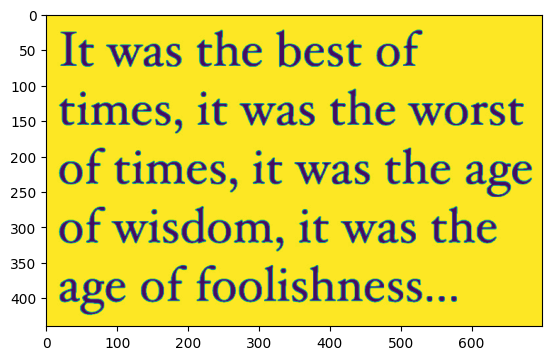

In [3]:
plt.imshow(img)
print(img.shape)

(array([[  0.,   0.,   0., ...,   0.,   0., 440.],
        [  0.,   0.,   0., ...,   0.,   0., 440.],
        [  0.,   0.,   0., ...,   0.,   0., 440.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0., 440.],
        [  0.,   0.,   0., ...,   0.,   0., 440.],
        [  0.,   0.,   0., ...,   0.,   0., 440.]]),
 array([0.06666667, 0.16      , 0.25333333, 0.34666666, 0.44      ,
        0.53333336, 0.62666667, 0.72      , 0.81333333, 0.9066667 ,
        1.        ], dtype=float32),
 <a list of 700 BarContainer objects>)

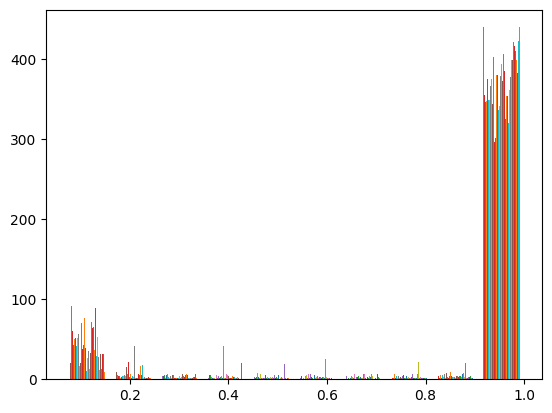

In [4]:
plt.hist(img)

In [5]:
img[img>0.5] = 1.
img[img<=0.5] = 0.

[0. 1.]


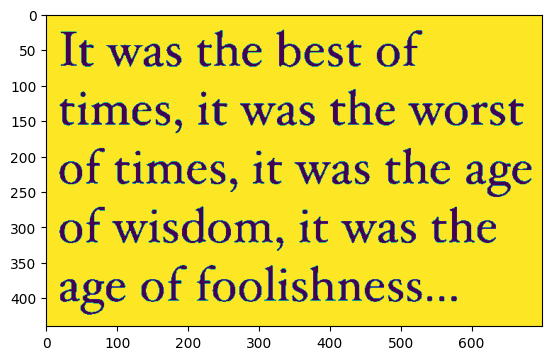

In [6]:
plt.imshow(img)
print(np.unique(img))

(array([[440.,   0.,   0., ...,   0.,   0.,   0.],
        [440.,   0.,   0., ...,   0.,   0.,   0.],
        [440.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [440.,   0.,   0., ...,   0.,   0.,   0.],
        [440.,   0.,   0., ...,   0.,   0.,   0.],
        [440.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 700 BarContainer objects>)

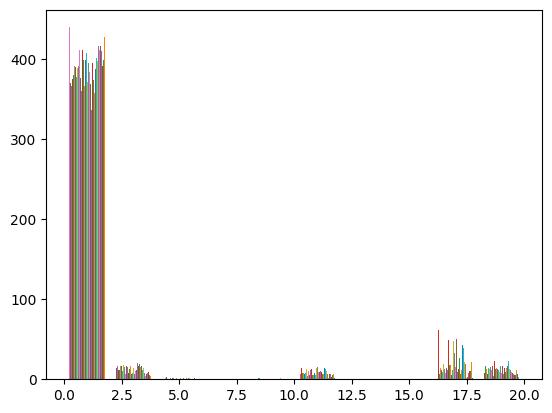

In [7]:
Gx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

imgx = np.zeros(img.shape)
imgy = np.zeros(img.shape)

for j in range(img.shape[0]-2):
    for i in range(img.shape[1]-2):
        imgx[j,i] = np.sum(Gx*img[j:j+3,i:i+3])
        imgy[j,i] = np.sum(Gy*img[j:j+3,i:i+3])

edges = imgx**2+imgy**2
plt.hist(edges)

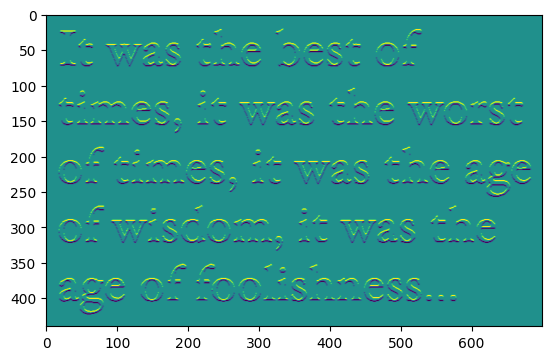

In [8]:
plt.imshow(imgy)

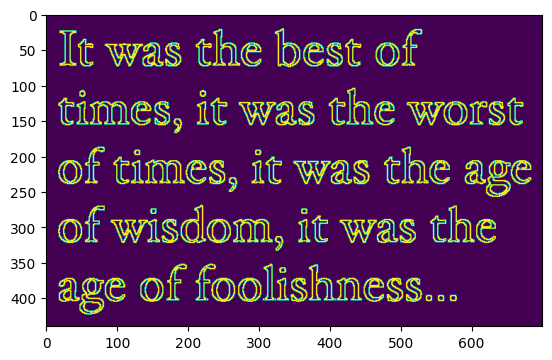

In [9]:
edges[edges>.5] = 1.
edges[edges<=.5] = 0.
plt.imshow(edges)

In [10]:
def connected_components(img):
    visited = set()
    def dfs(i,j,connected):
        if (j,i) in visited or (j,i) in connected:
            return
        visited.add((j,i))
        if img[j,i]==0:
            return 
        connected.add((j,i))
        for (di,dj) in [(1,0),(-1,0),(0,1),(0,-1),(1,1),(1,-1),(-1,1),(-1,-1)]:
            dfs(i+di,j+dj,connected)
    connections = []
    for j in range(img.shape[0]):
        for i in range(img.shape[1]):
            connection = set()
            dfs(i,j,connection)
            if len(connection)>10:
                connections.append(connection)
    return connections

In [11]:
connections = connected_components(edges)

In [12]:
print(len(connections))

94


In [13]:
x = np.array(list(connections[0]))[:,0]
y = np.array(list(connections[0]))[:,1]
print(x.shape)
print(edges[x,y].shape)

(536,)
(536,)


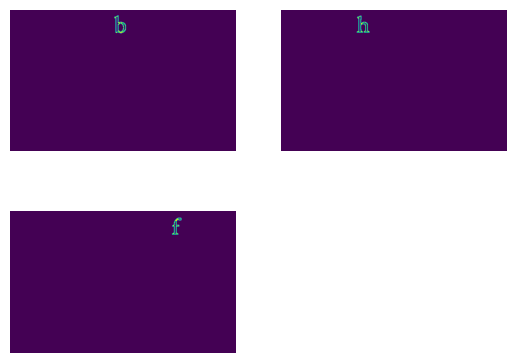

In [14]:
for k in range(3):
    x = np.array(list(connections[k]))[:,0]
    y = np.array(list(connections[k]))[:,1]
    char_img = np.zeros(img.shape)
    char_img[x,y] = 1
    plt.subplot(2,2,k+1)
    plt.imshow(char_img)
    plt.axis('off')

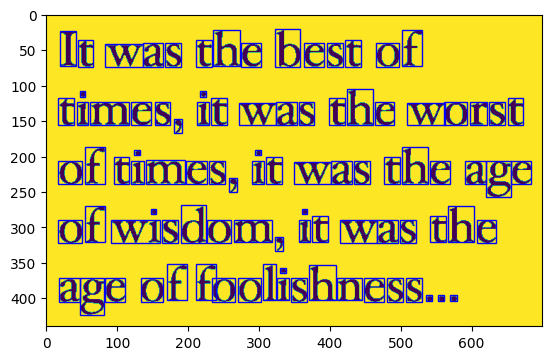

In [15]:
fig, ax = plt.subplots()
ax.imshow(img)
for k in range(len(connections)):
    x = np.array(list(connections[k]))[:,0]
    y = np.array(list(connections[k]))[:,1]
    xmin,xmax = min(x),max(x)
    ymin,ymax = min(y),max(y)
    ax.add_patch(Rectangle((ymin,xmin), 
                           ymax-ymin, 
                           xmax-xmin, 
                           edgecolor='blue', fill=False))